# Cattle Spread

In [1]:
import sys
sys.path.append('../')

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import src

import warnings
warnings.filterwarnings('ignore')

/Users/ericostring/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:7: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import (to_datetime, Int64Index, DatetimeIndex, Period,
/Users/ericostring/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:7: FutureWarning: pandas.Float64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import (to_datetime, Int64Index, DatetimeIndex, Period,


In [2]:
# Get all data available, as opposed to cutoff date of 2000
historical=True

In [3]:
# Cash price of live cattle
cash_price_live = pd.read_csv('../csv/price_received_ge_500_national.csv')
cash_price_live = src.usda_clean_monthly(cash_price_live, historical=historical)

- Chose to use futures price of feeder cattle since we have data since 1976, as opposed to 1999 for cash price. The two are highly correlated (check notebook [here](../monthly_analysis/futures_cash_price.ipynb)) and since we are averaging the daily data within each month, the results shouldn't be distorted much even if the time series hasn't been adjusted for contract rolling.

<AxesSubplot:title={'center':'Feeder Cattle Futures ($/cwt)'}>

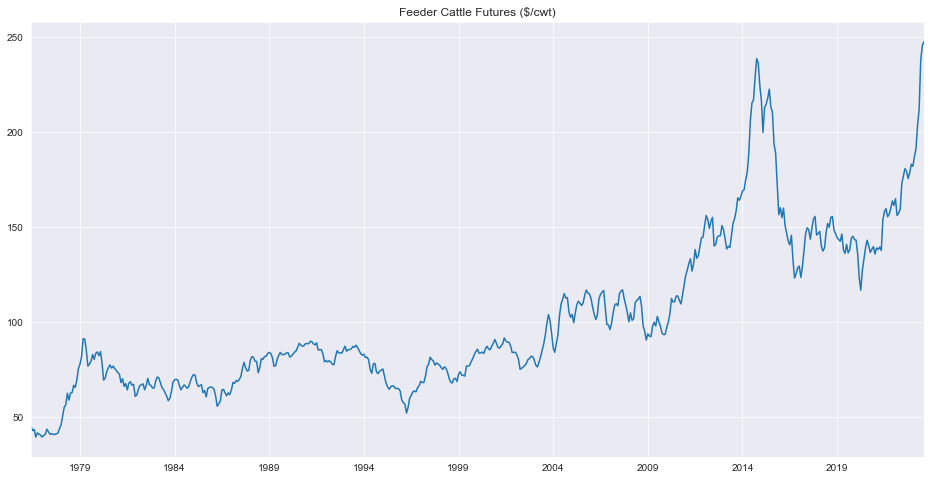

In [4]:
# Futures price feeder cattle
futures_feeder = pd.read_csv('../csv/feeder_cattle_futures.csv')
futures_feeder = src.clean_tv_data(futures_feeder, historical=historical)
futures_feeder = futures_feeder.resample('MS').mean()
futures_feeder.plot(title='Feeder Cattle Futures ($/cwt)')

Text(0, 0.5, '$/cwt')

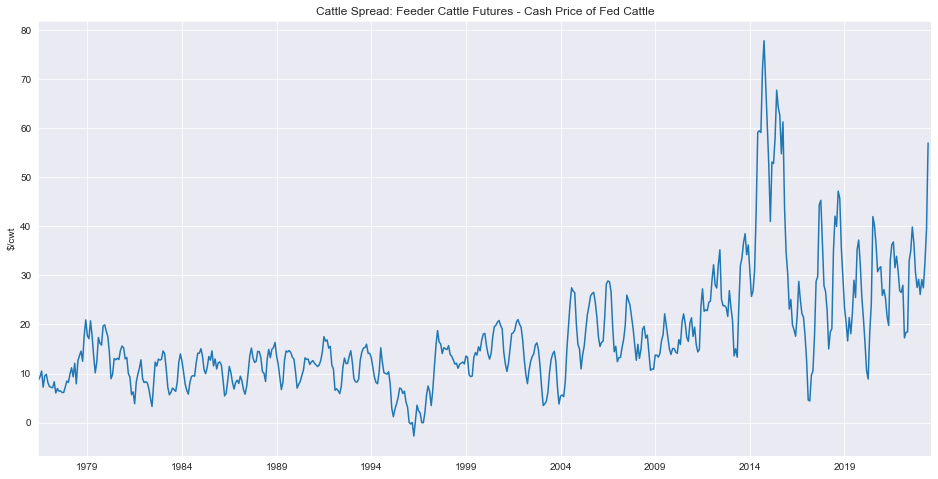

In [5]:
intersect = futures_feeder.index.intersection(cash_price_live.index)

cattle_spread = futures_feeder - cash_price_live[intersect]

cattle_spread.plot()

plt.title('Cattle Spread: Feeder Cattle Futures - Cash Price of Fed Cattle')
plt.ylabel('$/cwt')

- Upward trend is mostly due to inflation in both prices causing their difference to also inflate

In [6]:
src.plot_monthly_box_chart_plotly(cattle_spread,
                           title='Cattle Spread Monthly Box Chart',
                           ylabel='$/cwt',
                            xlabel='Month',
                           )

# src.plot_monthly_box_chart_matplotlib(cattle_spread,
#                            title='Cattle Spread Monthly Box Chart',
#                            ylabel='$/cwt',
#                             xlabel='Month',
#                            )

Text(0.5, 0, 'Month')

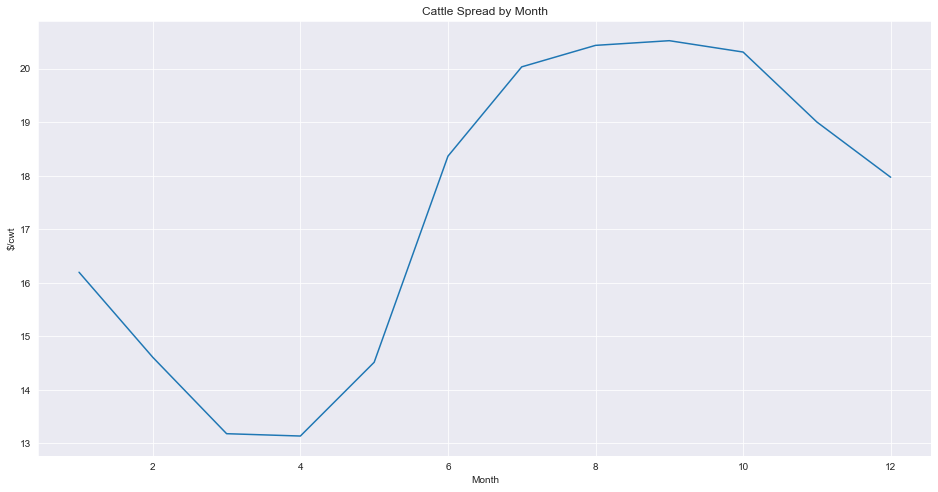

In [7]:
cattle_spread.groupby(cattle_spread.index.month).mean().plot()
plt.title('Cattle Spread by Month')
plt.ylabel('$/cwt')
plt.xlabel('Month')

- Rebase the cattle spread by dividing by the live cattle cash price (this should adjust the inflationary upward trend away)

Text(0, 0.5, '% of Live Cattle cash price')

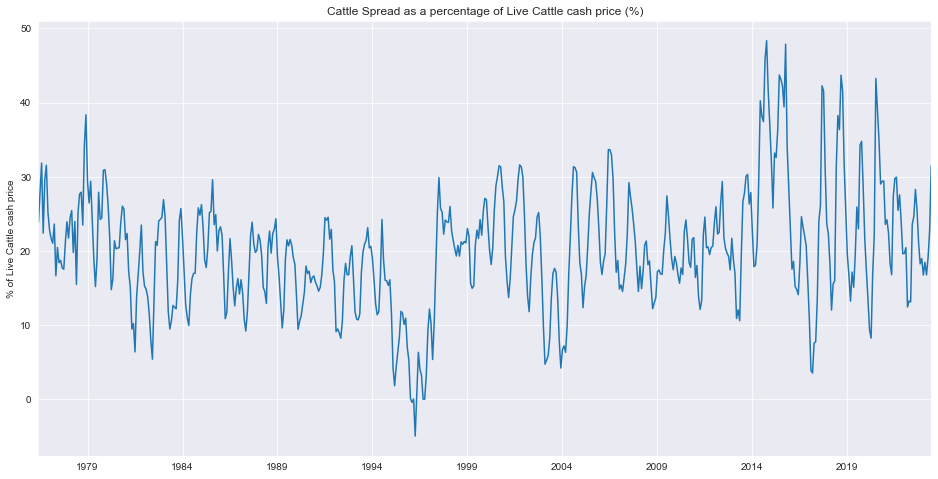

In [8]:
cattle_spread_rebased = cattle_spread / cash_price_live[intersect]
cattle_spread_rebased *= 100
cattle_spread_rebased = cattle_spread_rebased.dropna()

cattle_spread_rebased.plot()
plt.title('Cattle Spread as a percentage of Live Cattle cash price (%)')
plt.ylabel('% of Live Cattle cash price')

Text(0.5, 0, '% of Live Cattle cash price')

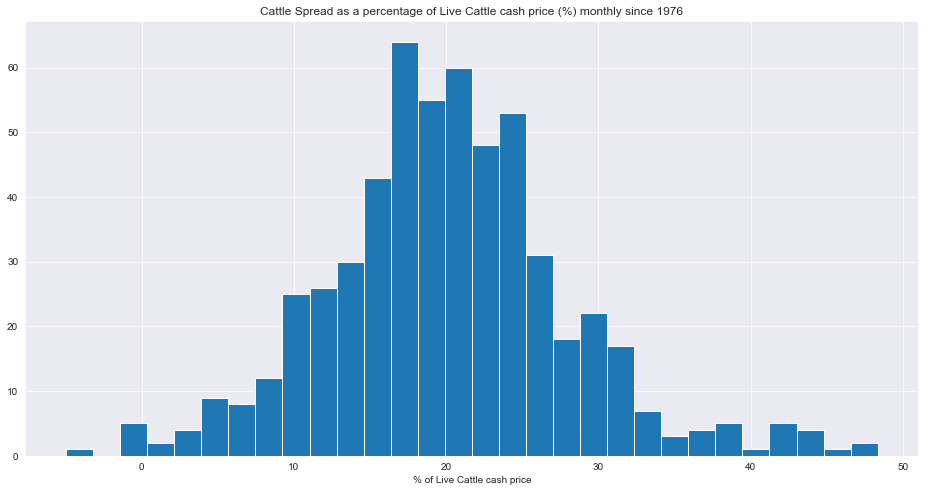

In [9]:
cattle_spread_rebased.hist(bins=30)
plt.title('Cattle Spread as a percentage of Live Cattle cash price (%) monthly since 1976')
plt.xlabel('% of Live Cattle cash price')

In [10]:
# Current spread estimate 16.9.2023
current_futures_feeder = 257.325
current_futures_live = 187.050

current_spread_rebased = (current_futures_feeder - current_futures_live)*100 / current_futures_live

print(f'Current spread estimate: {current_spread_rebased:.2f}%')

Current spread estimate: 37.57%


Text(0.5, 1.0, 'Cattle Spread Ratio: Feeder Cattle Futures / Cash Price of Fed Cattle')

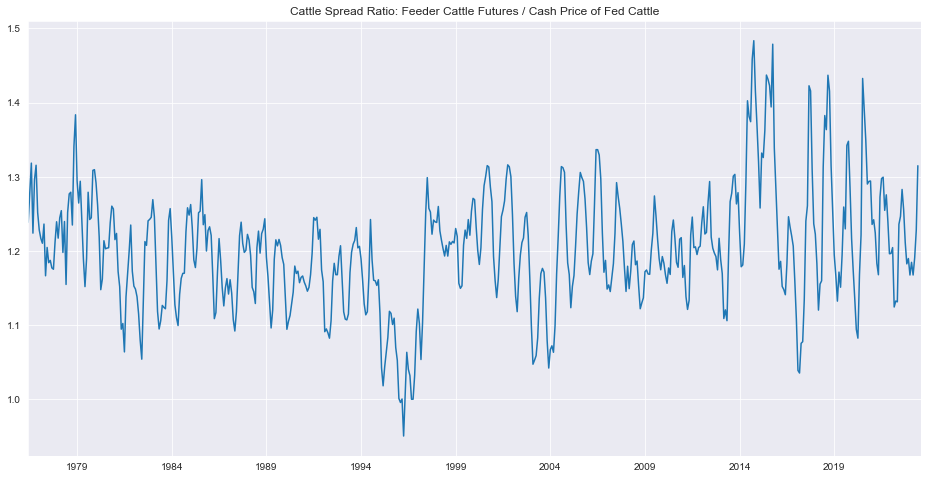

In [11]:
cattle_spread_ratio = futures_feeder / cash_price_live[intersect]

cattle_spread_ratio.plot()
plt.title('Cattle Spread Ratio: Feeder Cattle Futures / Cash Price of Fed Cattle')

<AxesSubplot:>

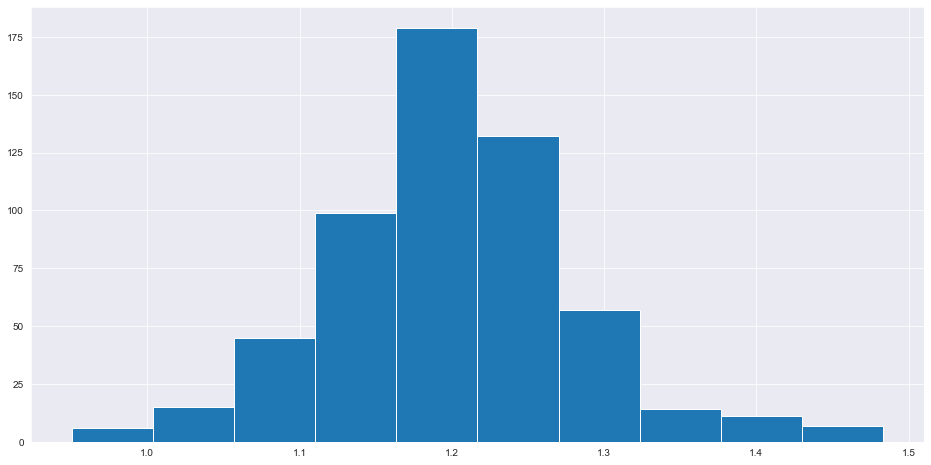

In [12]:
cattle_spread_ratio.hist()

In [13]:
# Current spread estimate 16.9.2023
current_futures_feeder = 257.325
current_futures_live = 187.050

current_spread_ratio = current_futures_feeder/current_futures_live

print(f'Current spread ratio: {current_spread_ratio:.2f}')

Current spread ratio: 1.38


In [14]:
data = cattle_spread_ratio[cattle_spread_ratio.index.month == 9]
count_below = len([x for x in data if x < current_spread_ratio])
percentage_below = (count_below / len(data)) * 100

print(f'Percentage of septembers since 1976 where spread was below current spread estimate: {percentage_below:.2f}%')

Percentage of septembers since 1976 where spread was below current spread estimate: 91.49%


Text(0, 0.5, 'Ratio')

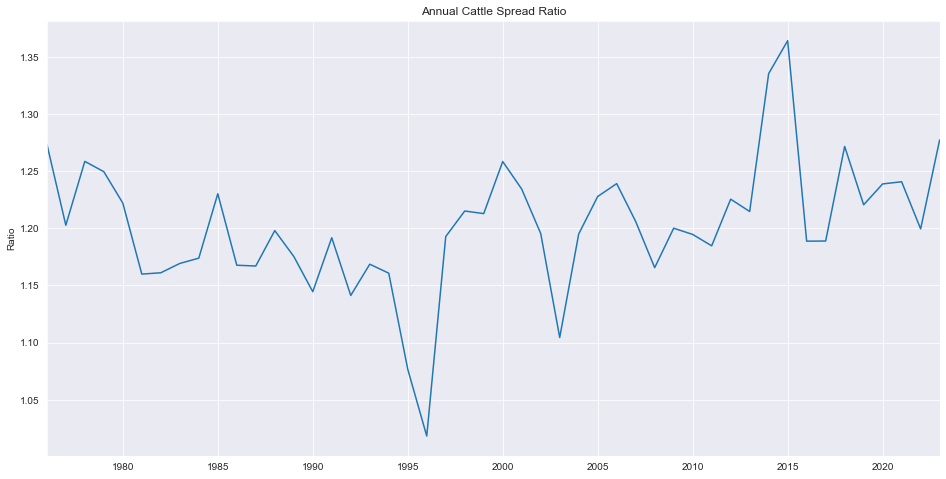

In [15]:
cattle_spread_ratio_annual = futures_feeder.resample('Y').mean() / cash_price_live[intersect].resample('Y').mean()

cattle_spread_ratio_annual.plot()

plt.title('Annual Cattle Spread Ratio')
plt.ylabel('Ratio')

In [16]:
cattle_spread_ratio_annual_pct_chg = cattle_spread_ratio_annual.pct_change()*100
cattle_spread_ratio_annual_pct_chg = cattle_spread_ratio_annual_pct_chg.dropna()
cattle_spread_ratio_annual_pct_chg.name = 'cattle_spread_ratio_annual_pct_chg'

### Calves to On Feed Ratio

In [17]:
inventory_calves = pd.read_csv('../csv/inventory_calves.csv')
inventory_calves = src.usda_clean_biannual(inventory_calves, historical=historical)

on_feed = pd.read_csv('../csv/inventory_on_feed_biannual.csv')
on_feed = src.usda_clean_biannual(on_feed, historical=historical)

In [18]:
calve_to_on_feed_ratio_annual = inventory_calves.resample('Y').mean() /  on_feed.resample('Y').mean()
calve_to_on_feed_ratio_annual = calve_to_on_feed_ratio_annual.dropna()

Text(0.5, 1.0, 'Calves to Cattle On Feed Ratio (annual)')

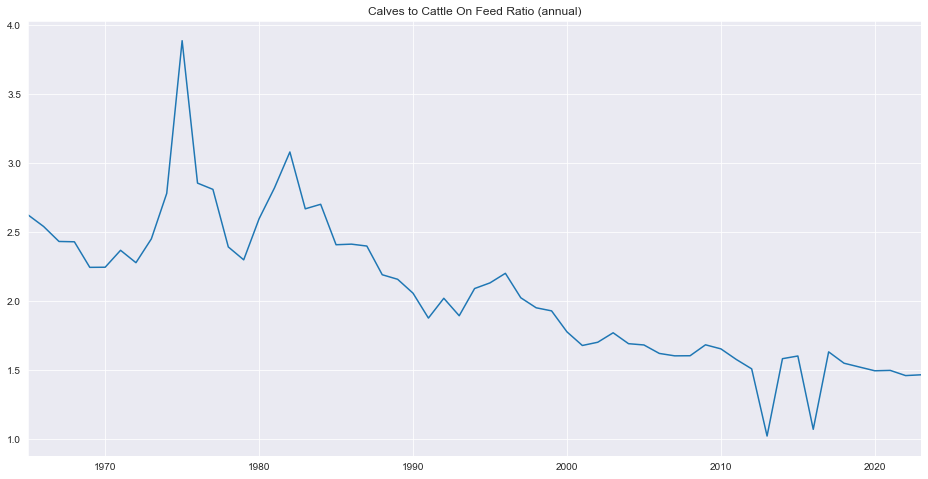

In [19]:
calve_to_on_feed_ratio_annual.plot()
plt.title('Calves to Cattle On Feed Ratio (annual)')

In [20]:
calve_to_on_feed_ratio_annual_pct_chg = calve_to_on_feed_ratio_annual.pct_change()
calve_to_on_feed_ratio_annual_pct_chg = calve_to_on_feed_ratio_annual_pct_chg.dropna()
calve_to_on_feed_ratio_annual_pct_chg.name = 'calve_to_on_feed_ratio_annual_pct_chg'

## Regression

- Hypothesis is that on an annual basis, a higher calves to on feed ratio will be negatively associated with feeder cattle futures to live cattle cash price

In [21]:
import statsmodels.api as sm
from statsmodels.tools import add_constant


y = cattle_spread_ratio_annual_pct_chg

X = sm.add_constant(calve_to_on_feed_ratio_annual_pct_chg[cattle_spread_ratio_annual_pct_chg.index])



model = sm.OLS(y, X).fit()

print(model.summary())

                                    OLS Regression Results                                    
Dep. Variable:     cattle_spread_ratio_annual_pct_chg   R-squared:                       0.017
Model:                                            OLS   Adj. R-squared:                 -0.005
Method:                                 Least Squares   F-statistic:                    0.7790
Date:                                Mon, 18 Sep 2023   Prob (F-statistic):              0.382
Time:                                        01:34:18   Log-Likelihood:                -141.65
No. Observations:                                  47   AIC:                             287.3
Df Residuals:                                      45   BIC:                             291.0
Df Model:                                           1                                         
Covariance Type:                            nonrobust                                         
                                            coef  

- 